## Preprocessing

In [49]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [50]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
y = application_df.drop(columns=['EIN','NAME'])
y[:5]

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [51]:
# Determine the number of unique values in each column.
unique_counts = y.nunique()
unique_counts

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [52]:
# Look at APPLICATION_TYPE value counts for binning
app_counts = application_df['APPLICATION_TYPE'].value_counts()
app_counts

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [53]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(app_counts[app_counts<200].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64

In [54]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df['CLASSIFICATION'].value_counts()
classification_counts

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64

In [55]:
# You may find it helpful to look at CLASSIFICATION value counts >1
application_df['CLASSIFICATION'].value_counts().loc[lambda x : x >1]

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: count, dtype: int64

In [56]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(classification_counts[classification_counts<300].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: count, dtype: int64

In [57]:
# Convert categorical data to numeric with `pd.get_dummies`
dummies = pd.get_dummies(application_df)
dummies.head()

,EIN,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_1 DAY RANCH RESCUE AND RURAL OKLAHOMA ANIMAL RESOURCE INC,NAME_100 BLACK MEN OF AMERICA,NAME_100 BLACK MEN OF MEMPHIS INC,NAME_100 BLACK MEN OF WEST GEORGIA INC,NAME_1150 WEBSTER STREET INC,NAME_116TH CAVALRY REGIMENT CHAPTER OF THE US CAVALRY & ARMOR ASSOCIATION,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,10520599,1,5000,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,10531628,1,108590,1,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
2,10547893,1,5000,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,10553066,1,6692,1,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
4,10556103,1,142590,1,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [58]:
# Split our preprocessed data into our features and target arrays
X = dummies.drop('IS_SUCCESSFUL', axis=1).values
y = dummies['IS_SUCCESSFUL'].values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 78)

In [59]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [60]:
X_train_scaled


array([[ 1.43002891,  0.01394306, -0.03348439, ..., -0.06987849,
         0.02789425, -0.02789425],
       [ 0.41629215,  0.01394306, -0.03348439, ..., -0.06987849,
         0.02789425, -0.02789425],
       [-0.1852473 ,  0.01394306, -0.03348439, ..., -0.06987849,
         0.02789425, -0.02789425],
       ...,
       [-1.15238491,  0.01394306, -0.03229417, ..., -0.06987849,
         0.02789425, -0.02789425],
       [ 0.4154169 ,  0.01394306, -0.03348439, ..., -0.06987849,
         0.02789425, -0.02789425],
       [-0.22314116,  0.01394306, -0.01093629, ..., -0.06987849,
         0.02789425, -0.02789425]])

## Compile, Train and Evaluate the Model

In [62]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  50
hidden_nodes_layer2 = 30
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(input_dim=number_input_features , units=hidden_nodes_layer1, activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units= hidden_nodes_layer2, activation='relu'))


# Output layer (output is 1 and sigmoid because it's binary classifier)
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 50)                980700    
                                                                 
 dense_9 (Dense)             (None, 30)                1530      
                                                                 
 dense_10 (Dense)            (None, 1)                 31        
                                                                 
Total params: 982261 (3.75 MB)
Trainable params: 982261 (3.75 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [64]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])

In [65]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 8s 8ms/step - loss: 0.4949 - accuracy: 0.7607
Epoch 2/100
804/804 [==============================] - 7s 8ms/step - loss: 0.1431 - accuracy: 0.9479
Epoch 3/100
804/804 [==============================] - 6s 8ms/step - loss: 0.0987 - accuracy: 0.9612
Epoch 4/100
804/804 [==============================] - 6s 8ms/step - loss: 0.0947 - accuracy: 0.9616
Epoch 5/100
804/804 [==============================] - 6s 8ms/step - loss: 0.0931 - accuracy: 0.9620
Epoch 6/100
804/804 [==============================] - 6s 8ms/step - loss: 0.0928 - accuracy: 0.9619
Epoch 7/100
804/804 [==============================] - 7s 9ms/step - loss: 0.0909 - accuracy: 0.9629
Epoch 8/100
804/804 [==============================] - 7s 8ms/step - loss: 0.0905 - accuracy: 0.9633
Epoch 9/100
804/804 [==============================] - 6s 8ms/step - loss: 0.0896 - accuracy: 0.9637
Epoch 10/100
804/804 [==============================] - 6s 8ms/step - loss: 0.0889 - accura

In [66]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
#model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.8614 - accuracy: 0.6454 - 861ms/epoch - 3ms/step
Loss: 0.8613957166671753, Accuracy: 0.6453644037246704


<Axes: >

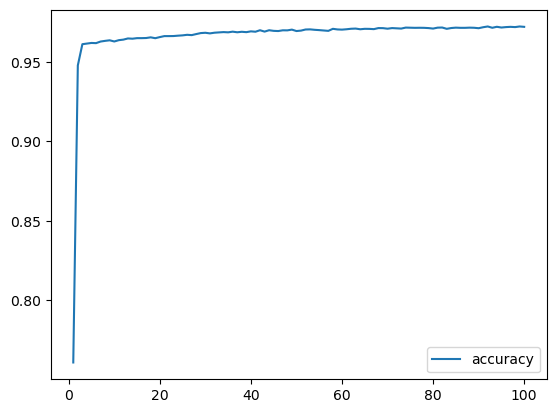

In [67]:
# plotting the accuracy
history_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
history_df.plot(y = 'accuracy')

In [69]:
# Export our model to HDF5 file

nn.save('../h5_files/AlphabetSoupCharity_model_2.h5')

In [ ]:
This is 2 attempt

In [37]:
print("Shape of X_train_scaled:", X_train_scaled.shape)


Shape of X_train_scaled: (25724, 19613)


In [38]:
def create_model(hp):
    nn = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=10,
        step=2), activation=activation, input_dim=X_train_scaled.shape[1]))  
    
    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=10,
            step=2),
            activation=activation))
    
    nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn


In [39]:
# Import the kerastuner library
import keras_tuner as kt

In [40]:
tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2)

Reloading Tuner from .\untitled_project\tuner0.json


In [41]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

Trial 56 Complete [00h 01m 30s]
val_accuracy: 0.7883381843566895

Best val_accuracy So Far: 0.7981340885162354
Total elapsed time: 01h 00m 53s


In [42]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'sigmoid',
 'first_units': 9,
 'num_layers': 3,
 'units_0': 7,
 'units_1': 3,
 'units_2': 7,
 'units_3': 9,
 'units_4': 5,
 'units_5': 1,
 'tuner/epochs': 20,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 0,
 'tuner/round': 0}

In [43]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.4902 - accuracy: 0.7981 - 585ms/epoch - 2ms/step
Loss: 0.4901760518550873, Accuracy: 0.7981340885162354


<Axes: >

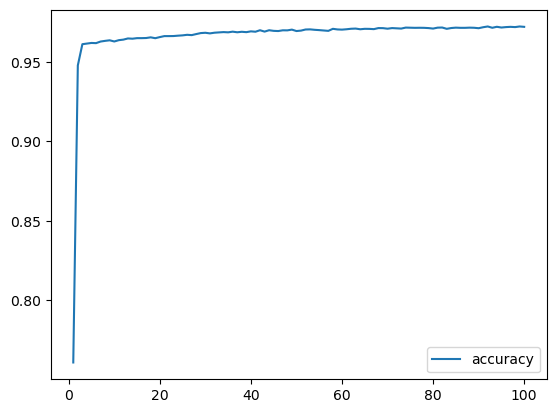

In [75]:
# plotting the accuracy
history_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
history_df.plot(y = 'accuracy')

In [77]:
# Export our model to HDF5 file
nn.save('../h5_files/AlphabetSoupCharity_Optimization.keras')

